In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [141]:
dataset = 'GreenGenes'
metric = 'hamming'
max_depth = 100

In [142]:
raw_data = pd.read_csv(
    f'logs/info_{metric}_{max_depth}.csv',
    dtype={
        'cluster_name': str,
        'number_of_points': int,
        'center': int,
        'radius': np.float64,
        'lfd': np.float64,
        'is_leaf': bool,
    }
)
raw_data['cluster_name'][0] = ''
raw_data = raw_data.fillna(0.0)
raw_data['depth'] = list(map(len, raw_data.cluster_name.values))
raw_data.head()

/home/nishaq/Documents/research/CHESS/.chess/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
0,,805434,505707,0.104270,0.139542,False,0
1,0,763603,682122,0.093075,0.395822,False,1
2,00,375910,400286,0.092684,0.316145,False,2
3,000,108894,38542,0.088388,0.226381,False,3
4,0000,97978,340801,0.078625,0.128669,False,4


In [143]:
raw_data.shape

(332875, 7)

In [144]:
leaves = list(raw_data[raw_data.is_leaf == True].cluster_name.values)
print(len(leaves))

166438


In [145]:
tree_depth = max(raw_data.depth.values)
max_lfd = max(raw_data.lfd.values)
print(tree_depth, max_lfd)

100 7.53915881110803


In [146]:
raw_data.describe()

,number_of_points,center,radius,lfd,depth
count,332875.000000,332875.000000,332875.000000,332875.000000,332875.000000
mean,93.962710,403043.197591,0.006916,0.759277,32.309984
std,2649.978356,232526.456732,0.010853,0.695485,15.814172
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,201320.000000,0.000391,0.180572,23.000000
50%,11.000000,403351.000000,0.001302,0.642448,28.000000
75%,30.000000,604255.000000,0.009373,1.000000,36.000000
max,805434.000000,805432.000000,0.105051,7.539159,100.000000


In [147]:
raw_data[raw_data.lfd > 10]
# raw_data.lfd.clip(lower=0, upper=5, inplace=True)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth


In [148]:
fractal_dim_by_depth = [raw_data[raw_data.depth == i] for i in range(1 + max(raw_data.depth))]
fractal_dim_by_depth[3].head(20)

,cluster_name,number_of_points,center,radius,lfd,is_leaf,depth
3,000,108894,38542,0.088388,0.226381,False,3
41120,001,267016,414278,0.083181,0.444109,False,3
154772,010,40592,546300,0.083572,0.352486,False,3
171261,011,347101,605413,0.084483,0.130472,False,3
315150,100,3562,15245,0.066389,1.683428,False,3
316575,101,9136,691264,0.062744,1.344768,False,3
320443,110,28349,597020,0.068732,0.133803,False,3
332576,111,784,48821,0.067561,2.781820,False,3


In [149]:
print(f'depth, number_of_clusters, r_median, r_mean, r_stddev')
for d, temp_df in enumerate(fractal_dim_by_depth):
    mean_radius = temp_df.radius.mean()
    median_radius = temp_df.radius.median()
    stddev_radius = temp_df.radius.std()
    if d % 10 == 0:
        print(f'{d}, {temp_df.shape[0]}, {median_radius:.5f}, '
              f'{mean_radius:.5f}, {stddev_radius:.5f}')

depth, number_of_clusters, r_median, r_mean, r_stddev
0, 1, 0.10427, 0.10427, nan
10, 662, 0.04426, 0.04139, 0.01722
20, 11702, 0.01367, 0.01447, 0.01184
30, 12010, 0.00104, 0.00281, 0.00406
40, 3974, 0.00052, 0.00070, 0.00117
50, 1904, 0.00039, 0.00052, 0.00051
60, 1134, 0.00039, 0.00050, 0.00045
70, 712, 0.00052, 0.00050, 0.00040
80, 544, 0.00052, 0.00047, 0.00037
90, 446, 0.00046, 0.00045, 0.00033
100, 360, 0.00052, 0.00043, 0.00029


In [150]:
labels = [i / 10 for i in range(11)]
quantiles = {i : [temp_df.lfd.quantile(l) for l in labels]
             for i, temp_df in enumerate(fractal_dim_by_depth)}

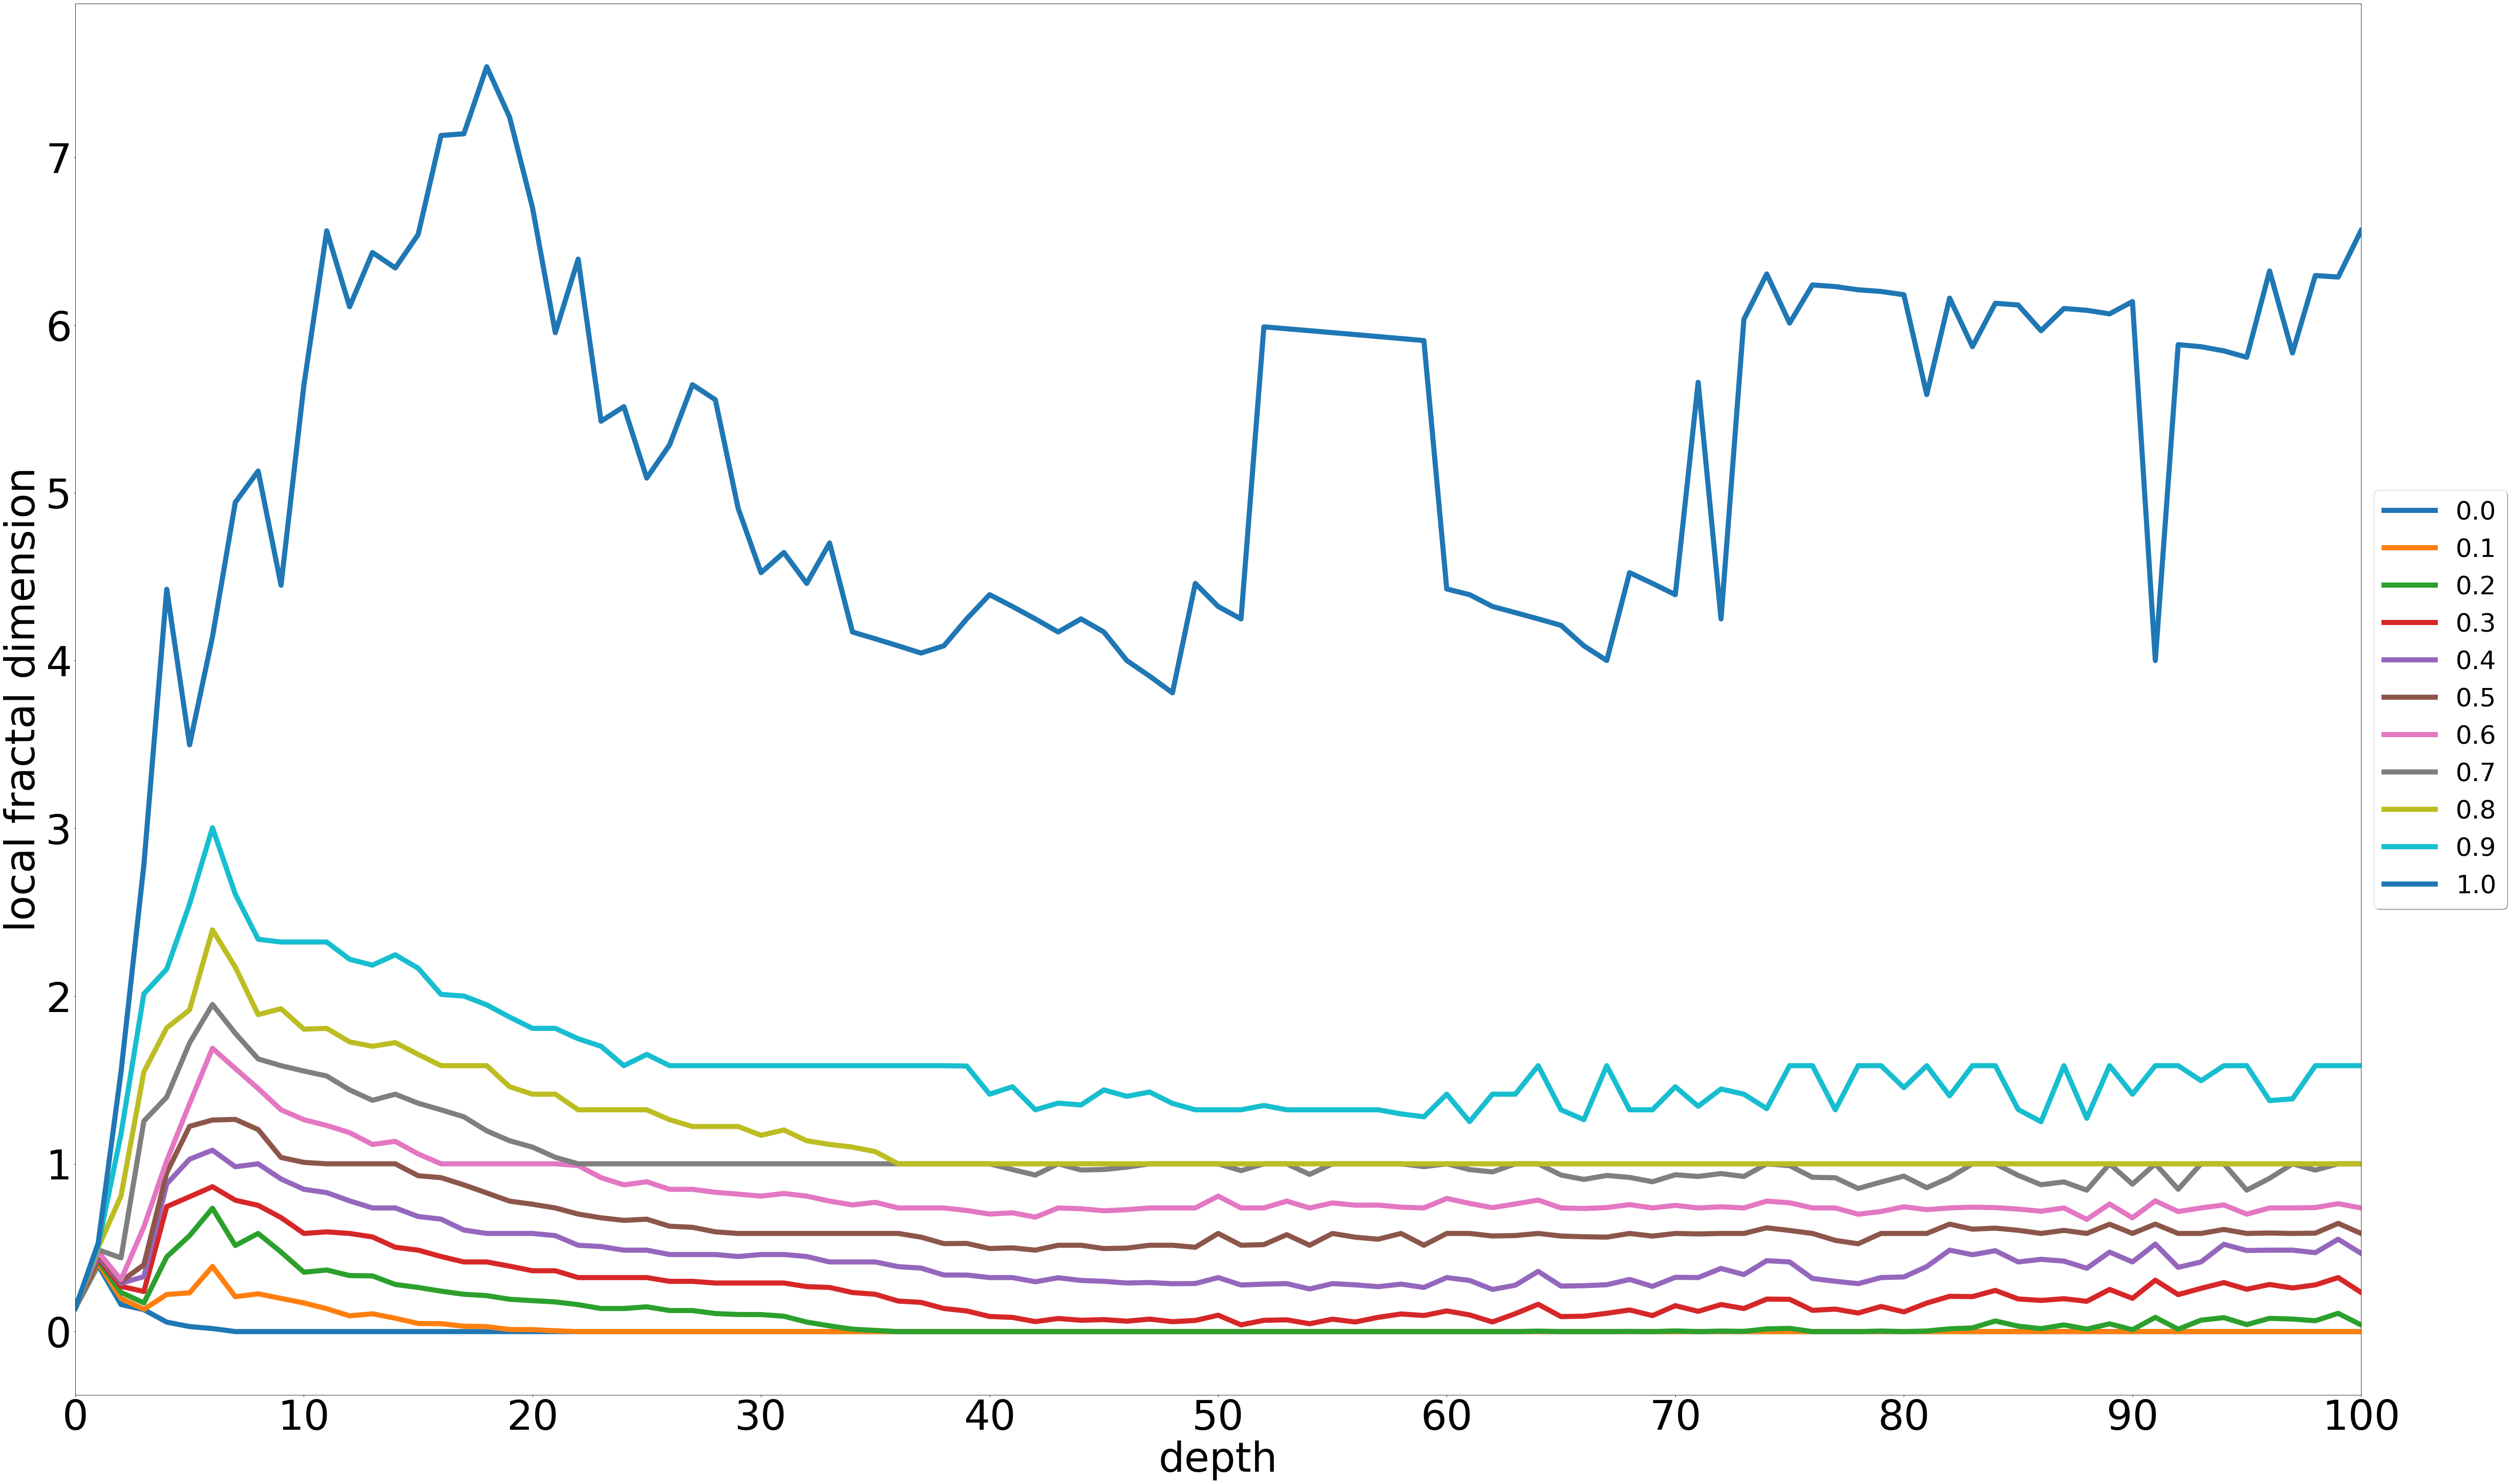

In [151]:
tags = list(map(str, labels))
quantiles_df = pd.DataFrame(quantiles)
quantiles_df['quantiles'] = labels
quantiles_df.set_index('quantiles', inplace=True)
quantiles_df_transpose = quantiles_df.T
fig, ax = plt.subplots()
my_plt = quantiles_df_transpose.plot(figsize=(100, 50), ax=ax, linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':50},
          fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
plt.xticks(list(range(0, tree_depth + 1, 10)))
# ax.set_ylim([-0.5, 10.5])
# plt.yticks([i for i in range(0, 11, 2)])
plt.xlabel('depth', fontsize=80)
plt.ylabel('local fractal dimension', fontsize=80)
plt.show()
my_plt.get_figure().savefig(f'plots/lfd_vs_depth_{dataset}_{metric}.png')

In [104]:
num_queries = 10

In [64]:
raw_data = pd.read_csv(
    f'logs/search_benchmarks_{dataset}_{metric}.csv',
    dtype={
        'depth': int,
        'radius': np.float64,
        'correctness': bool,
        'false_negative_rate': np.float64,
        'num_hits': int,
        'num_clusters_searched': int,
        'fraction_searched': np.float64,
        'df_calls_made': int,
        'linear_time': np.float64,
        'chess_time': np.float64,
        'speedup_factor': np.float64,
    }
)
# raw_data = raw_data[:140]
raw_data.head()

,depth,radius,correctness,false_negative_rate,num_hits,num_clusters_searched,fraction_searched,df_calls_made,linear_time,chess_time,speedup_factor
0,0,0.001,True,0.0,124,1,1.000000,805434,47.218369,45.864625,1.030
1,5,0.001,True,0.0,124,24,0.984235,792736,47.218369,45.164666,1.045
2,10,0.001,True,0.0,124,102,0.630296,507662,47.218369,29.459536,1.603
3,15,0.001,True,0.0,124,183,0.242089,194987,47.218369,11.276362,4.187
4,20,0.001,True,0.0,124,114,0.005468,4404,47.218369,0.936547,50.418


In [65]:
# raw_data[raw_data.radius == 2000.0].chess_time.describe()

In [66]:
total_linear_time = raw_data.linear_time.sum() / (raw_data.shape[0] / num_queries)
total_chess_time = raw_data.chess_time.sum()
total_time = total_chess_time + total_linear_time
print(f'total time: {total_time:.4f}')

total time: 3720.6851


In [67]:
radii_dict = {
    'euclidean': [2000.0, 4000.0],
    'cosine': [0.0005, 0.001],
    'hamming': [0.001, 0.01],
}
radii = radii_dict[metric]

In [68]:
data_by_search_radius = {}
for r in radii:
    temp_df = raw_data[raw_data.radius == r]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_radius[r] = temp_df
data_by_search_radius.keys()

dict_keys([0.001, 0.01])

In [69]:
depths = list(range(0, max_depth + 1, 5))
depths

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [70]:
data_by_search_depth = {}
for d in depths:
    temp_df = raw_data[raw_data.depth == d]
    temp_df = temp_df.reset_index(drop=True)
    data_by_search_depth[d] = temp_df
data_by_search_depth.keys()

dict_keys([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [71]:
x = depths
y1 = []  # comparisons
y2 = []  # speedup
y3 = []  # time
y4 = []  # fraction
ys = []

In [72]:
print(f'depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, speedup_mu')
for r in radii:
    mos = data_by_search_radius[r].num_hits.mean()
    sos = data_by_search_radius[r].num_hits.std()
    print(f'\nradius: {r}, mean_output_size: {mos:.0f}, std_output_size: {sos:.0f}')
    for depth, df_by_depth in data_by_search_depth.items():
        data_df = df_by_depth[df_by_depth.radius == r]
        
        mean_df_calls = data_df.df_calls_made.mean() / 10_000
        stddev_df_calls = data_df.df_calls_made.std() / 10_000
        y1.append(mean_df_calls)
        
        mean_speedup = data_df.speedup_factor.mean()
        y2.append(mean_speedup)
        
        mean_time = data_df.chess_time.mean()
        stddev_time = data_df.chess_time.std()
        y3.append(mean_time)
        
        mean_fraction = data_df.fraction_searched.mean()
        stddev_fraction = data_df.fraction_searched.std()
        y4.append(mean_fraction)
        
        if (not depth in depths) or (depth % 10 != 0):
            continue
        print(f'{depth} & {mean_df_calls:.2f} & {stddev_df_calls:.2f} & {mean_time:.2f} & '
              f'{stddev_time:.2f} & {mean_fraction:.3f} & '
              f'{mean_speedup:.2f}\\\\')
    ys.append((y1.copy(), y2.copy(), y3.copy(), y4.copy()))
    y1, y2, y3, y4 = [], [], [], []

depth, df_calls_mu, df_calls_std, time_mu, time_std, fraction_mu, speedup_mu

radius: 0.001, mean_output_size: 245, std_output_size: 486
0 & 80.54 & 0.00 & 45.78 & 0.21 & 1.000 & 1.00\\
10 & 46.84 & 18.58 & 26.86 & 10.67 & 0.582 & 3.02\\
20 & 3.39 & 4.24 & 2.88 & 2.90 & 0.042 & 57.54\\
30 & 0.32 & 0.34 & 1.40 & 1.02 & 0.004 & 66.86\\
40 & 0.22 & 0.19 & 1.37 & 0.98 & 0.003 & 67.51\\
50 & 0.21 & 0.17 & 1.36 & 0.99 & 0.003 & 68.02\\

radius: 0.01, mean_output_size: 1924, std_output_size: 2364
0 & 80.54 & 0.00 & 45.62 & 0.03 & 1.000 & 1.00\\
10 & 59.09 & 14.46 & 33.86 & 8.21 & 0.734 & 1.45\\
20 & 12.59 & 9.05 & 9.82 & 6.45 & 0.156 & 12.57\\
30 & 2.79 & 2.82 & 5.77 & 4.22 & 0.035 & 18.20\\
40 & 2.66 & 2.69 & 5.58 & 3.98 & 0.033 & 18.34\\
50 & 2.66 & 2.69 & 5.57 & 3.98 & 0.033 & 18.39\\


In [73]:
np.shape(ys[0][0])

(11,)

<Figure size 432x288 with 0 Axes>

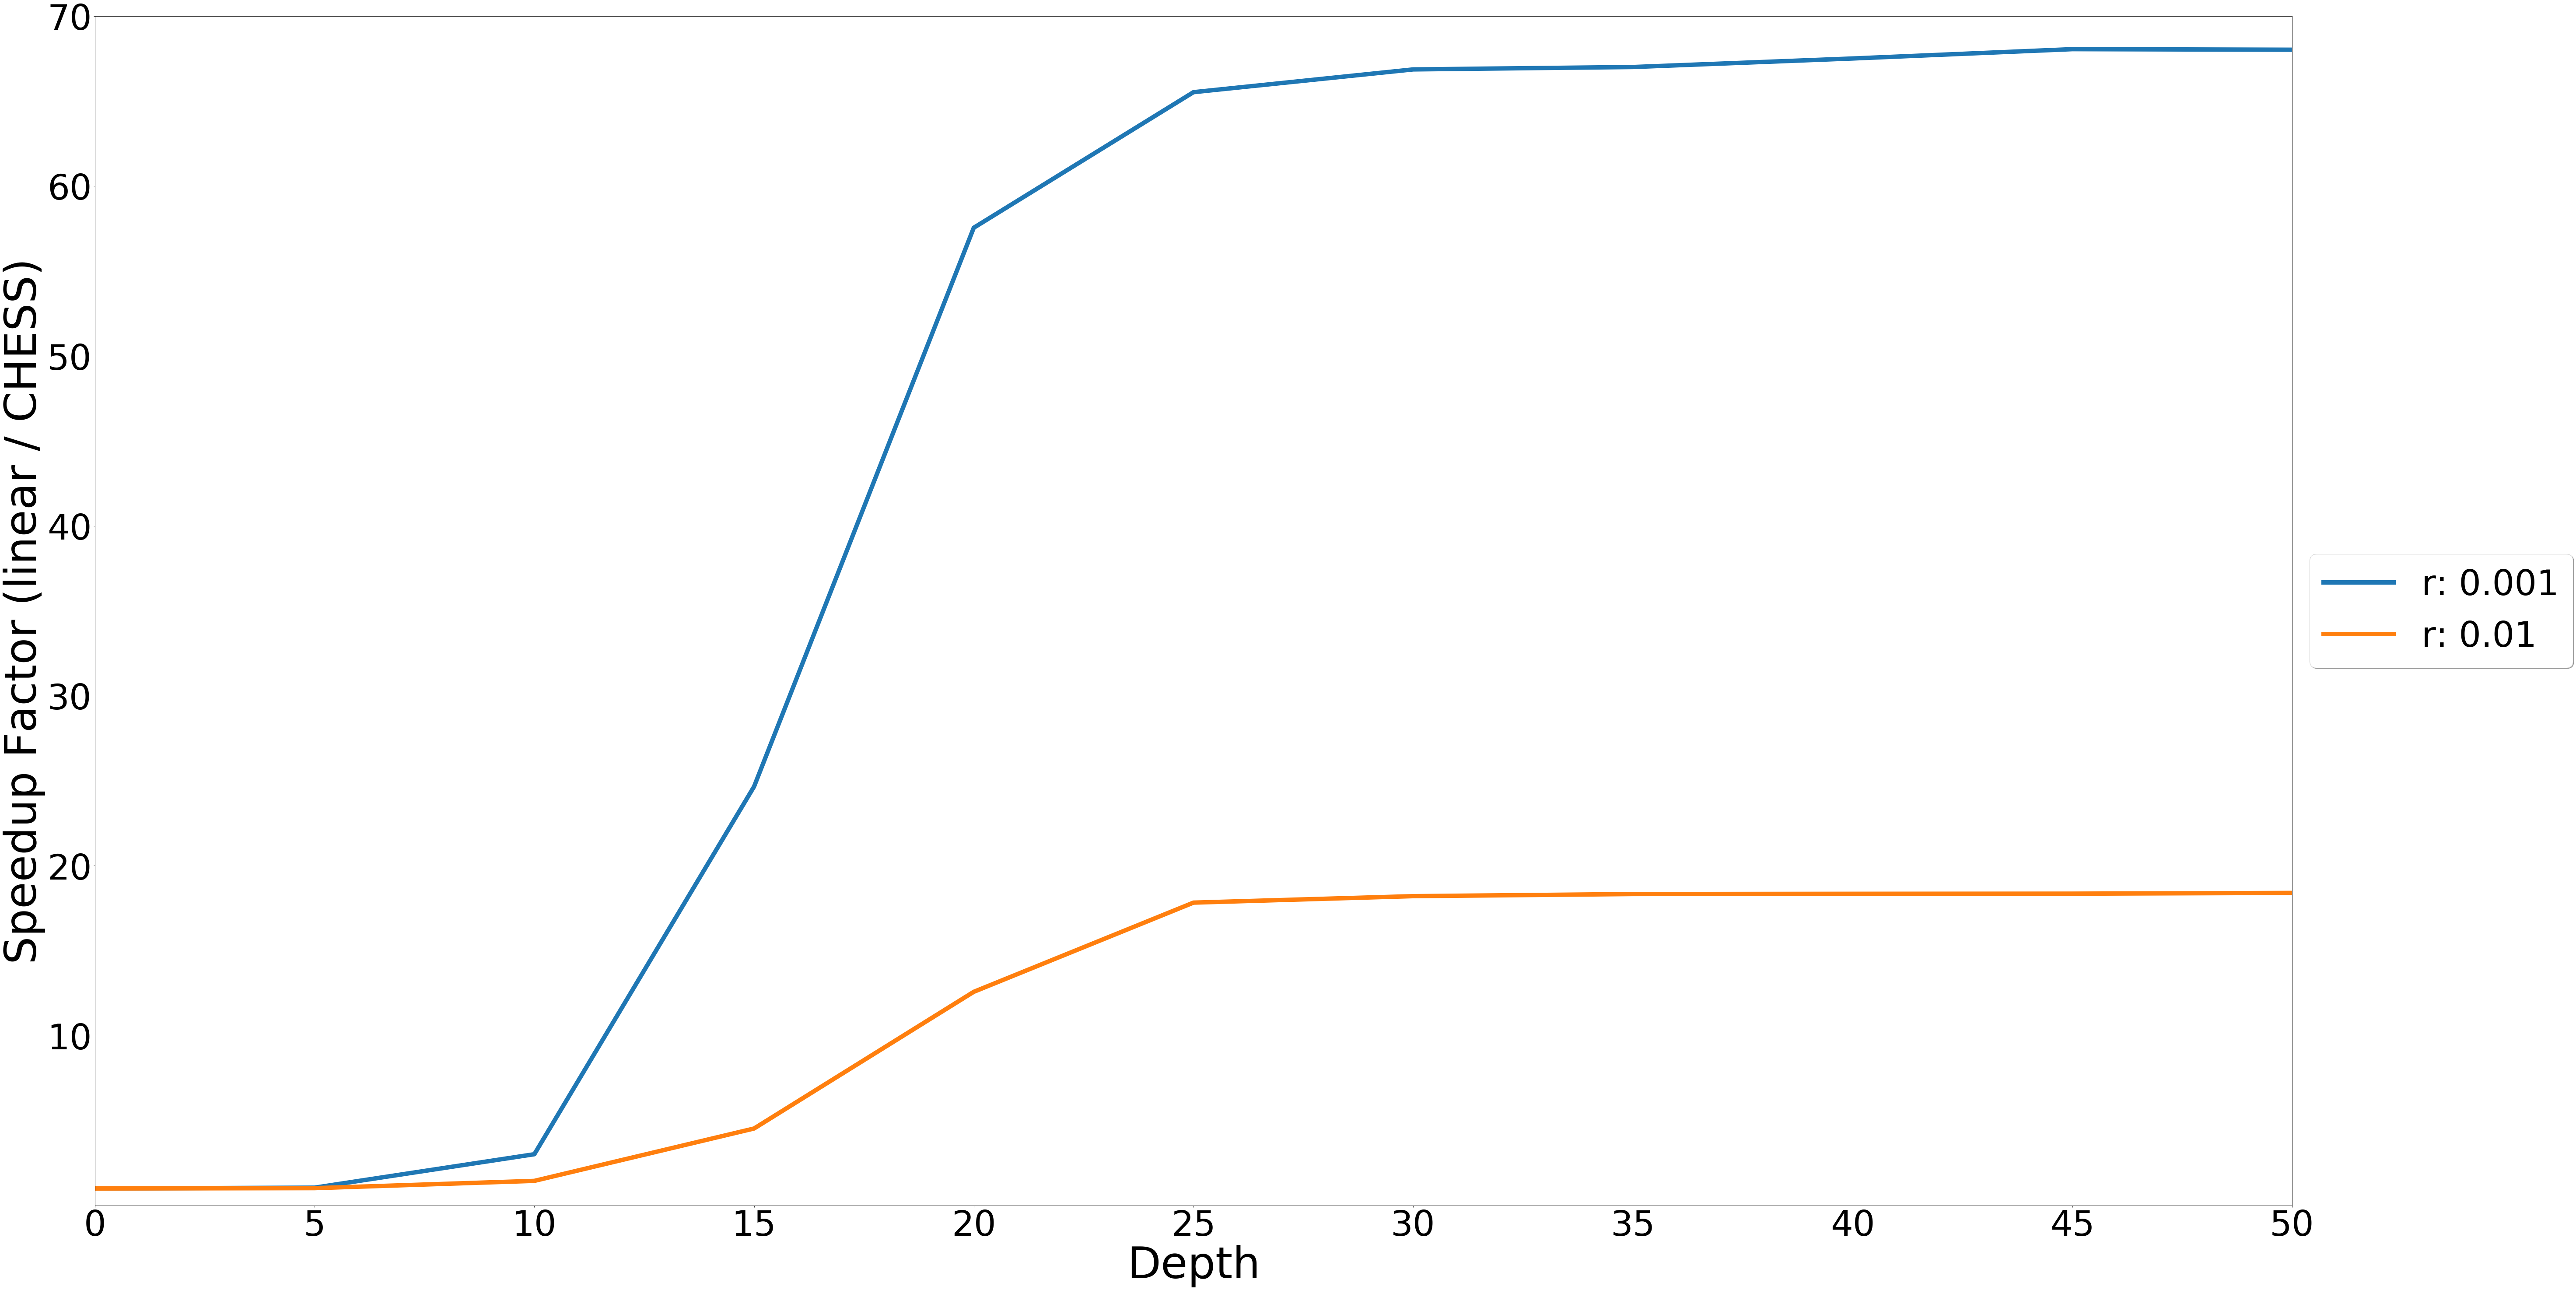

In [74]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][1], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 70])
plt.yticks([i for i in range(10, 71, 10)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Speedup Factor (linear / CHESS)', fontsize=100)
plt.show()
fig.savefig(f'plots/speedup_factor_{dataset}_{metric}.png')

<Figure size 432x288 with 0 Axes>

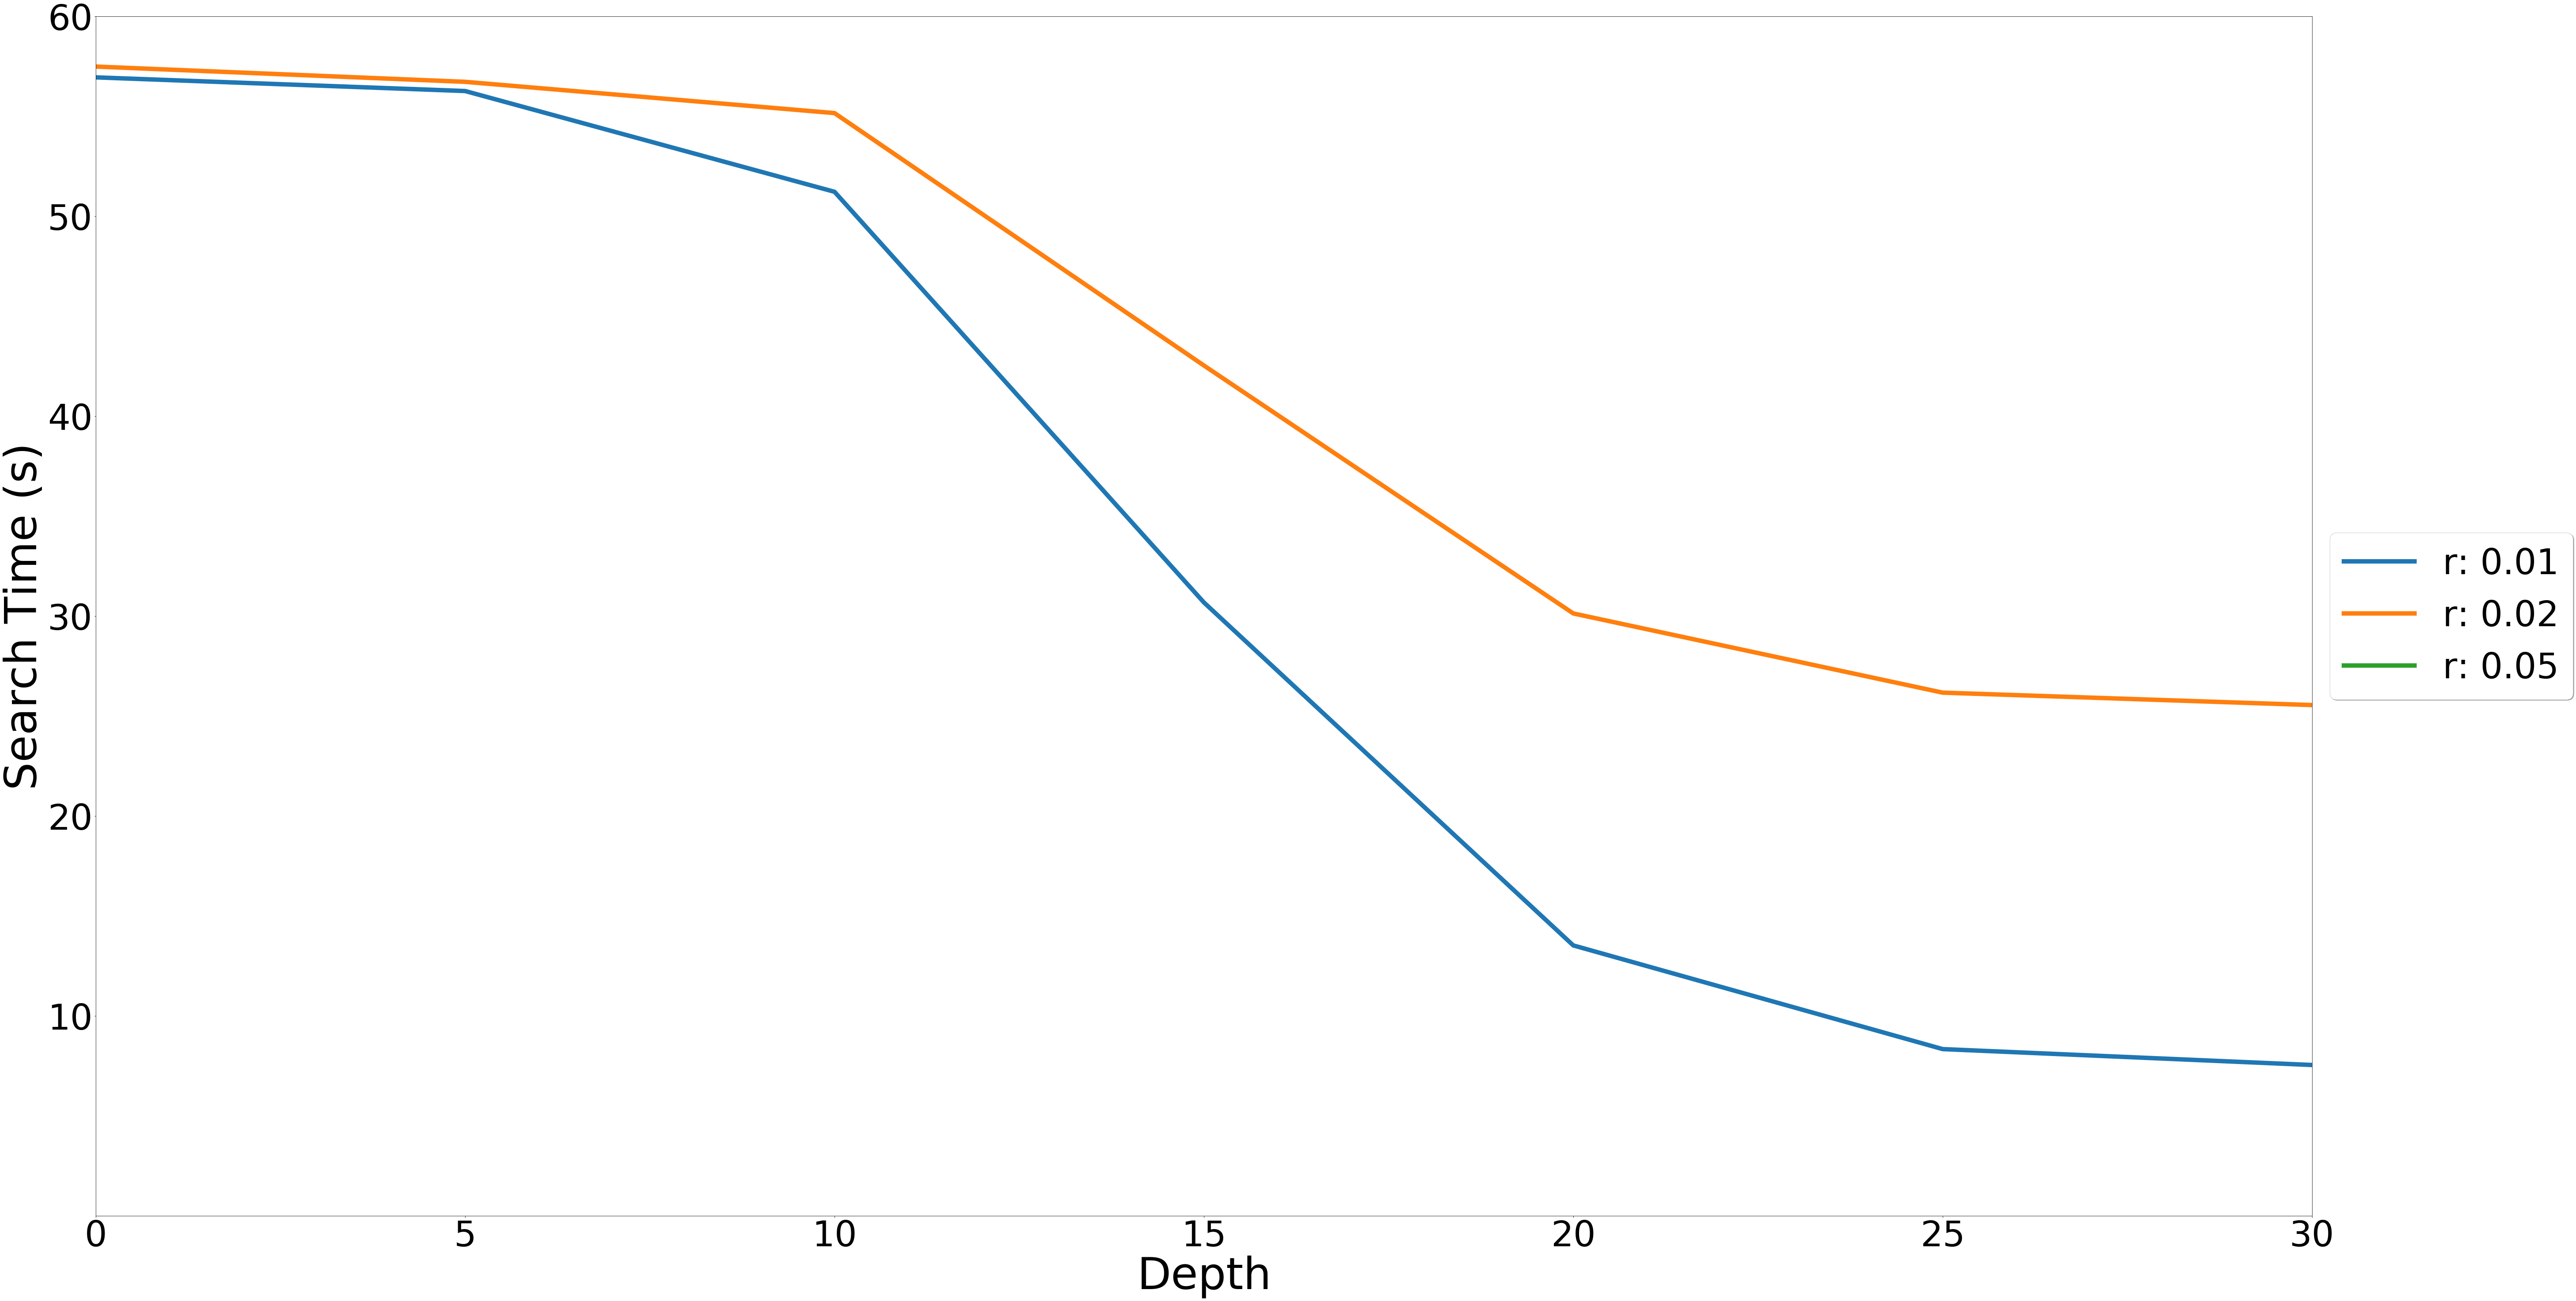

In [80]:
plt.clf()
fig = plt.figure(figsize=(100, 50))
ax = fig.add_subplot(1, 1, 1)
for i in range(len(radii)):
    plt.plot(x, ys[i][2], label=f'r: {str(radii[i])}', linewidth=10)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':80}, fancybox=True, shadow=True)
ax.tick_params(axis='both', which='major', labelsize=80)
ax.set_xlim([0, max_depth])
plt.xticks([i for i in range(0, max_depth + 1, 5)])
ax.set_ylim([0, 60])
plt.yticks([i for i in range(10, 61, 10)])
plt.xlabel('Depth', fontsize=100)
plt.ylabel('Search Time (s)', fontsize=100)
plt.show()
fig.savefig(f'plots/search_time_{dataset}_{metric}.png')